<a href="https://colab.research.google.com/github/yasinazhdari/Intro-to-Tensorflow-Simple-Classification-with-fully-connected-networks-on-IRIS-data-set-/blob/main/2_1_Classification_of_Cifar10_images_with_Convolutional_Neural_Networks_(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2-1_Classification of Cifar10 images with Convolutional Neural Networks (CNNs)**


In [ ]:
# importing required libraries, other libraries will be included in case throughout the note book.
import numpy as  np
from tensorflow  import keras
from keras.datasets import                cifar10
from sklearn.model_selection import  train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.optimizers import Adam
%matplotlib inline


<div style="direction:ltr;text-align:left;font-family:Tahoma">
<br>
This Data Set consists of color images of size 32*32 in 10 different classes, including: Horses, Cars, Trucks, ..., which exists in Keras Datasets.
<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
# Next, loading the data for training and testing objectives from the above mentioned data set. 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape )
print(y_train.shape)
print(y_test.shape )

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
import matplotlib.pyplot as plt

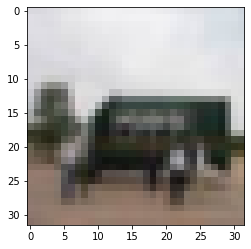

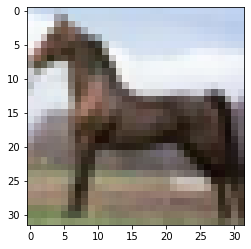

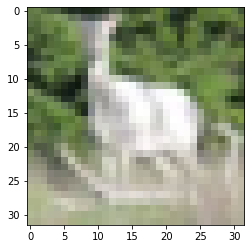

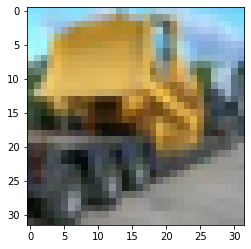

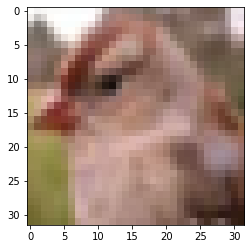

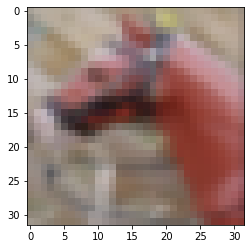

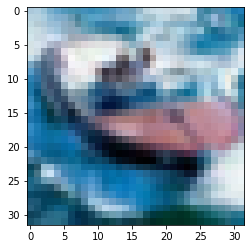

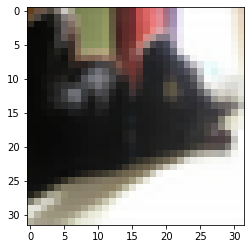

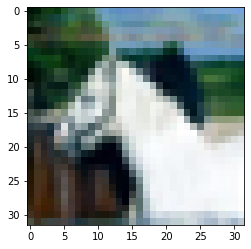

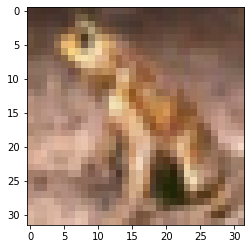

In [ ]:
# Taking a look into the Dataset.
from random     import randint
from matplotlib import  figure
for i in range(10):
  figure,
  plt.imshow(x_train[randint(1,50000)], cmap='gray')
  plt.show()

In [ ]:
# Converting data types to float 32, and normalizing pixel values between 0 and 1.
x_train = x_train.astype('float32')
x_test  = x_test. astype('float32')
x_train /= 255
x_test  /= 255

In [ ]:
y_train[0:10]
# As observed, labels are numerical, so next, we will one-hot encode them.

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(y_train).shape

(10,)

In [ ]:
# one-hot coding the corresponding multi class labels.
y_train =  keras.utils.to_categorical(y_train, num_classes=10)
y_test  =  keras.utils.to_categorical(y_test , num_classes=10)

In [ ]:
y_train[0:10]
# Previously observed numerical labels, now in one-hot format.

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# <div style="direction:ltr;text-align:left;font-family:Tahoma">Building the model of a convolutional neural network with the following architecture:</div>
<div style="direction:ltr;text-align:left;font-family:Tahoma">
<ul>
    <li>
    a convolutional layer with 32 filters, filter size of 3*3, and ReLU activation function.    </li>
    <li>
    a maxpooling layer with pool size of (2,2)    </li>
    <li>
    a convolutional layer with 32 filters, filter size of 3*3, and ReLU activation function.    </li>
    <li>
    a maxpooling layer with pool size of (2,2)    </li>
    <li>
    a convolutional layer with 64 filters, filter size of 3*3, and ReLU activation function.    </li>
    <li>
    a maxpooling layer with pool size of (2,2)    </li>
    <li>
    a flatten layer to vectorize the previous output.
    <li>
    a Drop out layer with the rate of 0.5 before the final softmax layer.
    <li>
    finally, a softmax output layer for evaluation of out put probabilities.
    </li>    
 
</ul>
</div>


In [ ]:
# Building the model of a convolutional neural network with the following architecture:
# a convolutional layer with 32 filters, filter size of 3*3, and ReLU activation function.
# a maxpooling layer with pool size of (2,2)
# a convolutional layer with 32 filters, filter size of 3*3, and ReLU activation function.
# a maxpooling layer with pool size of (2,2)
# a convolutional layer with 64 filters, filter size of 3*3, and ReLU activation function.
# a maxpooling layer with pool size of (2,2)
# a flatten layer to vectorize the previous output.
# a Drop out layer with the rate of 0.5 before the final softmax layer.
# finally, a softmax output layer for evaluation of out put probabilities.

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compiling the model, using following optimizer: 
optimizer = Adam(lr=0.0001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Training and fitting the model with batchsize of 64 and 25 epochs. in order to  
# evaluate the model at each epoch, test data are considered as validation data
history=model.fit(x_train, y_train,epochs=25, batch_size=32, validation_data = (x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 18s 5ms/step - loss: 2.0903 - accuracy: 0.2254 - val_loss: 1.8639 - val_accuracy: 0.3383
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8355 - accuracy: 0.3186 - val_loss: 1.7031 - val_accuracy: 0.3819
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7176 - accuracy: 0.3628 - val_loss: 1.5986 - val_accuracy: 0.4253
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6453 - accuracy: 0.3931 - val_loss: 1.5389 - val_accuracy: 0.4507
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5877 - accuracy: 0.4151 - val_loss: 1.4945 - val_accuracy: 0.4662
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5505 - accuracy: 0.4329 - val_loss: 1.4849 - val_accuracy: 0.4780
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5183 - accuracy: 0.4426 - val_loss: 1.4248 - val_accuracy

In [ ]:
# in order to make comparisons, we have considered the maximum value of validation accuracies on each epoch.
val_acc = history.history['val_accuracy']
len(val_acc)

25

In [ ]:
max(val_acc)

0.5974000096321106

In [ ]:
# Finally, we will play with model's hyper parameters in order to increase accuracy.
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history1= model.fit(x_train, y_train,epochs=25, batch_size=32, validation_data = (x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 8s 4ms/step - loss: 1.7436 - accuracy: 0.3508 - val_loss: 1.4093 - val_accuracy: 0.4994
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4345 - accuracy: 0.4804 - val_loss: 1.2564 - val_accuracy: 0.5523
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3207 - accuracy: 0.5251 - val_loss: 1.1727 - val_accuracy: 0.5892
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2392 - accuracy: 0.5583 - val_loss: 1.0739 - val_accuracy: 0.6286
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1814 - accuracy: 0.5830 - val_loss: 1.0401 - val_accuracy: 0.6384
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1292 - accuracy: 0.5987 - val_loss: 1.0056 - val_accuracy: 0.6484
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0892 - accuracy: 0.6153 - val_loss: 1.0025 - val_accuracy:

In [ ]:
val_acc1 = history1.history['val_accuracy']
max(val_acc1)

0.7289000153541565